# Manual storm-centering code for WoFS ESA

This code allows full visualization and centering of WoFS mesocyclones with some external need for an Excel/Google Sheets spreadsheet. The end result is a time sequence of storm-centered WoFS files. 

### Import statements:

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import skimage
import glob
import datetime

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader


# Set shapefile variables

shapefiles = ['/Users/williamfaletti/Documents/python/thesis/mapping/us_counties_states/cb_2018_us_county_20m.shp',
                 '/Users/williamfaletti/Documents/python/thesis/mapping/us_counties_states/cb_2018_us_state_20m.shp']
edgecolor = ['gray', 'k']
lw = [0.5, 1.4]

## Find maxima and write maxima to file by case

The code in this section finds 20 local maxima of mid-level updraft helicity as candidates for the mesocyclone of interest. These maxima will be manually analyzed to identify that desired mesocyclone. This code returns netCDF files with dimensions num_times x maxima, so num_times x 20.

In [5]:
# May 17 2019

files = sorted(glob.glob('/Volumes/faletti_backup/WOFS_output/wofs_20190517_2100/wofs_i201905172100*'))

maxima_times = []
times = []
for i in range(len(files)):
    
    if i == 0:
        continue
        
    ds = xr.open_dataset(files[i])
    
    time = ds['XTIME'][0,0].values
    
    maxima_mems = []
    for j in range(36):
        uh_5min = ds['UP_HELI_MAX'][j,0,120:235,100:200].values
        lat = ds['XLAT'][0,0,120:235,100:200].values
        lon = ds['XLONG'][0,0,120:235,100:200].values
        # returned points are sorted high to low from max to threshold
        maxima = skimage.feature.peak_local_max(uh_5min, min_distance=1, num_peaks=20)
        
        maxima_mems.append(maxima)
        
    times.append(time)
    maxima_times.append(maxima_mems)

times = np.array(times)
maxima_times = np.array(maxima_times)

maxima_times_swap = np.swapaxes(maxima_times, 0, 1)

ds_new = xr.Dataset({'maxima_indices': xr.DataArray(data = maxima_times_swap,
                                                    dims = ['Member', 'Time', 'Maxima_num', 'XY']),
                    
                     'time': xr.DataArray(data = times,
                                          dims = 'Time') 
                    },
                    
                   attrs = {'NS_displacement': 120,
                            'EW_displacement': 100} )


ds_new.to_netcdf('/Users/williamfaletti/Desktop/maxima_indices_517_2100')

        #x = maxima[:,1]
        #y = maxima[:,0]
        
        #fig = plt.figure()
        
        #cb = plt.pcolormesh(lon, lat, uh_5min)
        #plt.scatter(lon[y,x], lat[y,x], s=1, c='r')
        #plt.title(f'Member {i}')
        #plt.colorbar(cb)
    
    #print(maxima)


KeyboardInterrupt



In [ ]:
# May 20 2019

files = sorted(glob.glob('/Volumes/faletti_backup/WOFS_output/wofs_20190520_2030/wofs_i201905202030*'))

maxima_times = []
times = []
for i in range(len(files)):
    
    if i == 0:
        continue
        
    ds = xr.open_dataset(files[i])
    
    time = ds['XTIME'][0,0].values
    
    maxima_mems = []
    for j in range(36):
        uh_5min = ds['UP_HELI_MAX'][j,0,135:195, 60:160].values
        lat = ds['XLAT'][0,0,135:195, 60:160].values
        lon = ds['XLONG'][0,0,135:195, 60:160].values
        # returned points are sorted high to low from max to threshold
        maxima = skimage.feature.peak_local_max(uh_5min, min_distance=1, num_peaks=20)
        
        maxima_mems.append(maxima)
        
    times.append(time)
    maxima_times.append(maxima_mems)

times = np.array(times)
maxima_times = np.array(maxima_times)

maxima_times_swap = np.swapaxes(maxima_times, 0, 1)

ds_new = xr.Dataset({'maxima_indices': xr.DataArray(data = maxima_times_swap,
                                                    dims = ['Member', 'Time', 'Maxima_num', 'XY']),
                    
                     'time': xr.DataArray(data = times,
                                          dims = 'Time') 
                    },
                    
                   attrs = {'NS_displacement': 135,
                            'EW_displacement': 60} )


ds_new.to_netcdf('/Users/williamfaletti/Desktop/maxima_indices_520')

In [334]:
# May 26 2019

files = sorted(glob.glob('/Volumes/TTU_desktop_backup/WOFS_output/wofs_20190526_2000/wofs_i201905262000*'))

maxima_times = []
times = []
for i in range(len(files)):
    
    if i == 0:
        continue
        
    ds = xr.open_dataset(files[i])
    
    time = ds['XTIME'][0,0].values
    
    maxima_mems = []
    for j in range(36):
        uh_5min = ds['UP_HELI_MAX'][j,0,150:250, 40:140].values
        lat = ds['XLAT'][0,0,150:250, 40:140].values
        lon = ds['XLONG'][0,0,150:250, 40:140].values
        # returned points are sorted high to low from max to threshold
        maxima = skimage.feature.peak_local_max(uh_5min, min_distance=1, num_peaks=20)
        
        maxima_mems.append(maxima)
        
    times.append(time)
    maxima_times.append(maxima_mems)

times = np.array(times)
maxima_times = np.array(maxima_times)

maxima_times_swap = np.swapaxes(maxima_times, 0, 1)

ds_new = xr.Dataset({'maxima_indices': xr.DataArray(data = maxima_times_swap,
                                                    dims = ['Member', 'Time', 'Maxima_num', 'XY']),
                    
                     'time': xr.DataArray(data = times,
                                          dims = 'Time') 
                    },
                    
                   attrs = {'NS_displacement': 150,
                            'EW_displacement': 40} )


ds_new.to_netcdf('/Users/williamfaletti/Desktop/maxima_indices_526')

In [9]:
# May 28 2019

files = sorted(glob.glob('/Volumes/TTU_desktop_backup/WOFS_output/wofs_20190528_2230/wofs_i201905282230*'))

maxima_times = []
times = []
for i in range(len(files)):
    
    if i == 0:
        continue
        
    ds = xr.open_dataset(files[i])
    
    time = ds['XTIME'][0,0].values
    
    maxima_mems = []
    for j in range(36):
        uh_5min = ds['UP_HELI_MAX'][j,0,150:250, 10:110].values
        lat = ds['XLAT'][0,0,150:250, 10:110].values
        lon = ds['XLONG'][0,0,150:250, 10:110].values
        # returned points are sorted high to low from max to threshold
        maxima = skimage.feature.peak_local_max(uh_5min, min_distance=1, num_peaks=20)
        
        maxima_mems.append(maxima)
        
    times.append(time)
    maxima_times.append(maxima_mems)

times = np.array(times)
maxima_times = np.array(maxima_times)

maxima_times_swap = np.swapaxes(maxima_times, 0, 1)

ds_new = xr.Dataset({'maxima_indices': xr.DataArray(data = maxima_times_swap,
                                                    dims = ['Member', 'Time', 'Maxima_num', 'XY']),
                    
                     'time': xr.DataArray(data = times,
                                          dims = 'Time') 
                    },
                    
                   attrs = {'NS_displacement': 150,
                            'EW_displacement': 10} )


ds_new.to_netcdf('/Users/williamfaletti/Desktop/maxima_indices_528')

ds_maxima['time'][time_idx-1]## Manually choose maxima corresponding to supercell in each member at 15-minute intervals

Manually set time and member indices, then ingest netCDF files to sort through maxima indices to find that corresponding to the desidred mesocyclone. Record the (ny,nx) indices in this Google Spreadsheet: https://docs.google.com/spreadsheets/d/1kIW24EVI_o40y6qxK9ShlL2XmAo61mRtvB2RgrkIqDM/edit#gid=0h

NOTE: If sorting 15-minute intervals, multiply time_idx by 3 in the first cell of this sequence. If 5-minute intervals, then multiply by 1 or simply comment out the multiplication statement.

IndexError: list index out of range

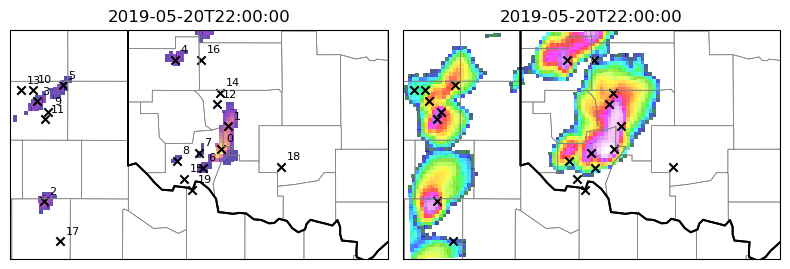

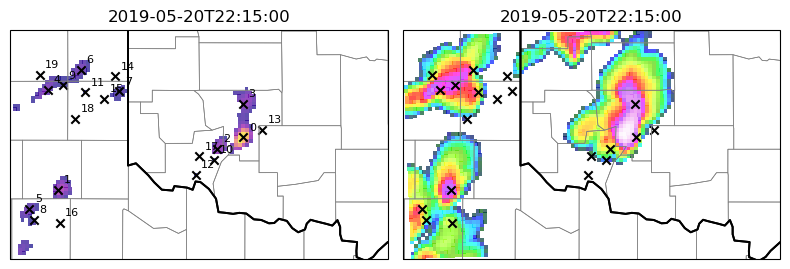

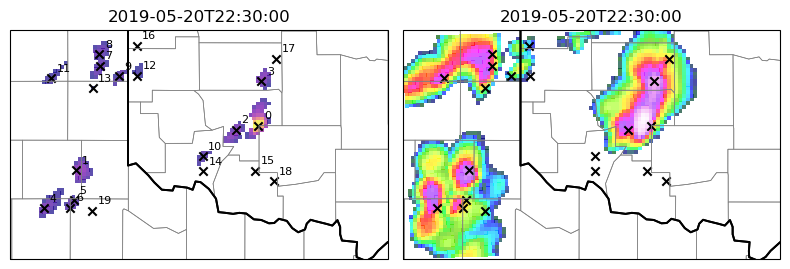

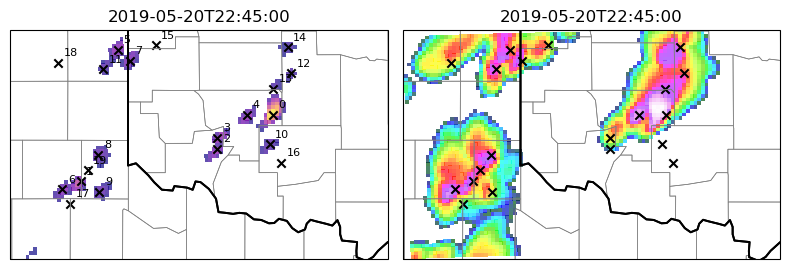

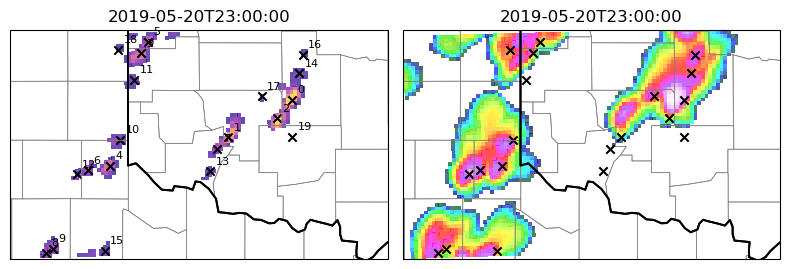

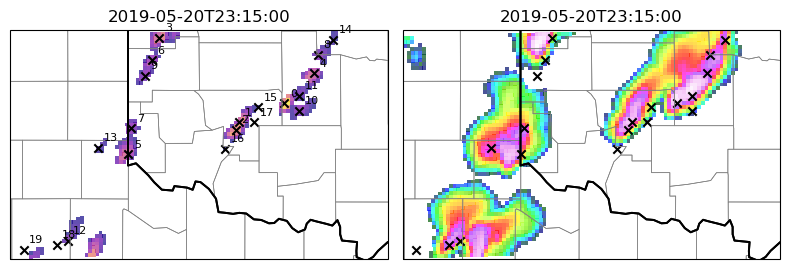

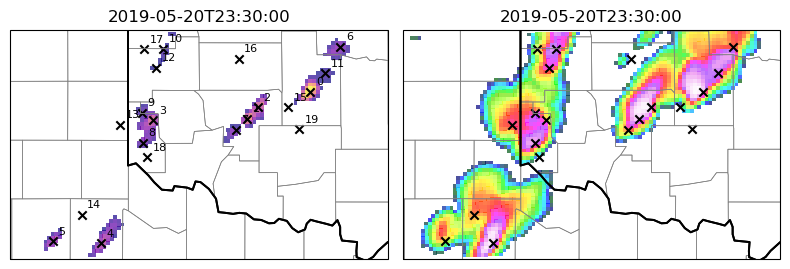

In [15]:
ds_maxima = xr.open_dataset('/Users/williamfaletti/Desktop/maxima_indices_520')

for i in range(6,15):
    files = sorted(glob.glob('/Volumes/faletti_backup/WOFS_output/wofs_20190520_2030/wofs_i*'))
    
    time_idx = i*3
    mem_idx = 30
    
    file = files[time_idx]
    
    ds_wofs = xr.open_dataset(file)
    cref = ds_wofs['REFD_MAX'][mem_idx,0,135:195, 60:160].values
    cref = np.where(cref >= 10, cref, np.nan)
    uh = ds_wofs['UP_HELI_MAX'][mem_idx,0,135:195, 60:160].values
    uh = np.where(uh >= 10, uh, np.nan)
    lat = ds_wofs['XLAT'][0,0,135:195, 60:160].values
    lon = ds_wofs['XLONG'][0,0,135:195, 60:160].values

    time_maxima = ds_maxima['time'][time_idx-1].values
    poss_maxima = ds_maxima['maxima_indices'][mem_idx, time_idx-1].values
    
    fig = plt.figure(figsize=(8,8))

    cmap = colors.ListedColormap(['k'])
    
    ax = plt.subplot(1,2,1,projection=ccrs.Mercator())
    cf = ax.pcolormesh(lon, lat, uh, cmap='plasma',
                     alpha=0.7, transform=ccrs.PlateCarree())
    
    #ax.scatter()
    
    for j in range(len(shapefiles)):
        reader = shpreader.Reader(shapefiles[j])
        vector_data = list(reader.geometries())
        VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
        ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])
    
    ax.set_title(str(time_maxima)[:-10])
    
    ax.scatter(lon[poss_maxima[:,0], poss_maxima[:,1]], lat[poss_maxima[:,0], poss_maxima[:,1]], 
               transform=ccrs.PlateCarree(), marker='x', c='k')
    
    for i in range(len(poss_maxima)):
        ax.annotate(i, 
                (lon[poss_maxima[i,0], poss_maxima[i,1]]+0.05, lat[poss_maxima[i,0], poss_maxima[i,1]]+0.05),
               transform=ccrs.PlateCarree(), size=8, c='k')
    
    ax = plt.subplot(1,2,2,projection=ccrs.Mercator())
    cf = ax.pcolormesh(lon, lat, cref, cmap='gist_ncar',
                     alpha=0.7, transform=ccrs.PlateCarree())
    
    for j in range(len(shapefiles)):
        reader = shpreader.Reader(shapefiles[j])
        vector_data = list(reader.geometries()) 
        VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
        ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])
    
    ax.set_title(str(time_maxima)[:-10])
    
    ax.scatter(lon[poss_maxima[:,0], poss_maxima[:,1]], lat[poss_maxima[:,0], poss_maxima[:,1]], 
               transform=ccrs.PlateCarree(), marker='x', c='k')
    
    plt.tight_layout()

In [14]:
len(files)

21

In [199]:
files = sorted(glob.glob('/Volumes/faletti_backup/WOFS_output/wofs_20190517_2200/wofs_i*'))

time_idx = 19
mem_idx = 35

file = files[time_idx]

ds_wofs = xr.open_dataset(file)
cref = ds_wofs['REFD_MAX'][mem_idx,0,120:235,100:200].values
cref = np.where(cref >= 10, cref, np.nan)
uh = ds_wofs['UP_HELI_MAX'][mem_idx,0,120:235,100:200].values
uh = np.where(uh >= 10, uh, np.nan)
lat = ds_wofs['XLAT'][0,0,120:235,100:200].values
lon = ds_wofs['XLONG'][0,0,120:235,100:200].values

ds_maxima = xr.open_dataset('/Users/williamfaletti/Desktop/maxima_indices_517')
time_maxima = ds_maxima['time'][time_idx-1].values
poss_maxima = ds_maxima['maxima_indices'][mem_idx, time_idx-1].values

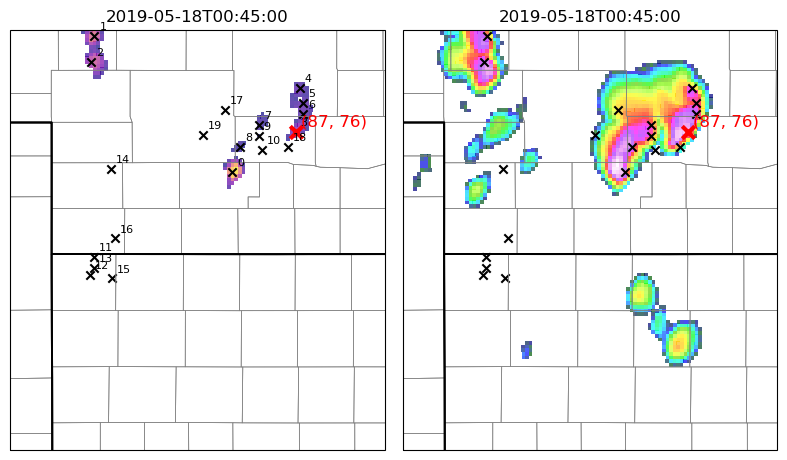

In [202]:
ds = xr.open_dataset(files[0])

fig = plt.figure(figsize=(8,8))

cmap = colors.ListedColormap(['k'])

ax = plt.subplot(1,2,1,projection=ccrs.Mercator())
cf = ax.pcolormesh(lon, lat, uh, cmap='plasma',
                 alpha=0.7, transform=ccrs.PlateCarree())

#ax.scatter()

for j in range(len(shapefiles)):
    reader = shpreader.Reader(shapefiles[j])
    vector_data = list(reader.geometries())
    VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
    ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])

ax.set_title(str(time_maxima)[:-10])

ax.scatter(lon[poss_maxima[:,0], poss_maxima[:,1]], lat[poss_maxima[:,0], poss_maxima[:,1]], 
           transform=ccrs.PlateCarree(), marker='x', c='k')

for i in range(len(poss_maxima)):
    ax.annotate(i, 
            (lon[poss_maxima[i,0], poss_maxima[i,1]]+0.05, lat[poss_maxima[i,0], poss_maxima[i,1]]+0.05),
           transform=ccrs.PlateCarree(), size=8, c='k')

ax.scatter(lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], 
           transform=ccrs.PlateCarree(), marker='x', s=80, linewidth=3, c='r')

ax.annotate((poss_maxima[test_idx,0], poss_maxima[test_idx,1]), 
            (lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05, lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05),
           transform=ccrs.PlateCarree(), size=12, c='r')

ax = plt.subplot(1,2,2,projection=ccrs.Mercator())
cf = ax.pcolormesh(lon, lat, cref, cmap='gist_ncar',
                 alpha=0.7, transform=ccrs.PlateCarree())

for j in range(len(shapefiles)):
    reader = shpreader.Reader(shapefiles[j])
    vector_data = list(reader.geometries()) 
    VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
    ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])

ax.set_title(str(time_maxima)[:-10])

ax.scatter(lon[poss_maxima[:,0], poss_maxima[:,1]], lat[poss_maxima[:,0], poss_maxima[:,1]], 
           transform=ccrs.PlateCarree(), marker='x', c='k')

ax.scatter(lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], 
           transform=ccrs.PlateCarree(), marker='x', s=80, linewidth=3, c='r')

ax.annotate((poss_maxima[test_idx,0], poss_maxima[test_idx,1]), 
            (lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05, lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05), 
           transform=ccrs.PlateCarree(), size=12, c='r')

#ax.set_extent([-101.8,-98.8,39.3,41.8])
#plt.title('WoFS Max Hourly UH Ending 0030 UTC', size=17)
#cbar = plt.colorbar(cf, pad=0.01)
#cbar.set_label('m$^2$s$^{-2}$', fontsize=14)
#cbar.ax.tick_params(labelsize=12)

plt.tight_layout()

In [201]:
test_idx = 3

### Determine MRMS centers by similarly sorting through maxima

Find local maxima as with WoFS members and save to netCDF file. Then manually sort through these maxima and record the (ny,nx) coordinates in the same spreadsheet.

In [21]:
# Create file with possible MRMS AWS maxima (26 May)

files = sorted(glob.glob('/Volumes/TTU_desktop_backup/MRMS_data/MRMS_20190526/mrms_new/*.nc'))

maxima_times = []
times = []
for i in range(len(files)):
    
    if i == 0:
        continue
    
    ds = xr.open_dataset(files[i])
    
    time_str = files[i][-16:-3]
    
    time = datetime.datetime(year=int(time_str[:4]),
                             month=int(time_str[4:6]),
                             day=int(time_str[6:8]),
                             hour=int(time_str[9:11]),
                             minute=int(time_str[11:13]))


    aws = ds['aws_mid_cress'][150:250, 40:140].values
    lat = ds['lat'][150:250, 40:140].values
    lon = ds['lon'][150:250, 40:140].values
    
    # returned points are sorted high to low from max to threshold
    maxima_time = skimage.feature.peak_local_max(aws, min_distance=1, num_peaks=40)
    
    maxima_times.append(maxima_time)
    times.append(time)

times = np.array(times)
maxima_times = np.array(maxima_times)

ds_new = xr.Dataset({'maxima_indices': xr.DataArray(data = maxima_times,
                                                    dims = ['Time', 'Maxima_num', 'XY']),
                    
                     'time': xr.DataArray(data = times,
                                          dims = 'Time') 
                     },
                    
                   attrs = {'NS_displacement': 150,
                            'EW_displacement': 40} )


ds_new.to_netcdf('/Users/williamfaletti/Desktop/mrms_maxima_indices_526')

In [204]:
ds_maxima_mrms = xr.open_dataset('/Users/williamfaletti/Desktop/mrms_maxima_indices_517')

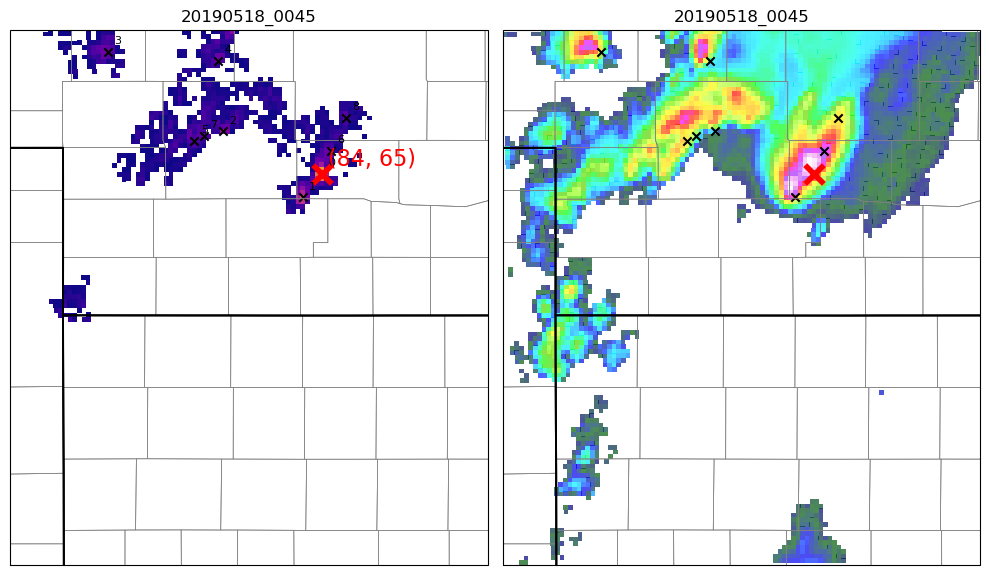

In [232]:
idx = 43
files = sorted(glob.glob('/Volumes/faletti_backup/MRMS_data/MRMS_20190517/*.nc'))[62:]

fig = plt.figure(figsize=(10,10))

cmap = colors.ListedColormap(['k'])

ax = plt.subplot(1,2,1,projection=ccrs.Mercator())

ds_mrms = xr.open_dataset(files[idx])

cref = ds_mrms['dz_cress'][120:235,100:200].values
cref = np.where(cref >= 10, cref, np.nan)
aws = ds_mrms['aws_mid_cress'][120:235,100:200].values
aws = np.where(aws > 0.0005, aws, np.nan)
lat = ds_mrms['lat'][120:235,100:200].values
lon = ds_mrms['lon'][120:235,100:200].values

poss_maxima = ds_maxima_mrms['maxima_indices'][idx].values

ax.pcolormesh(lon, lat, aws, transform=ccrs.PlateCarree(), cmap='plasma')

ax.scatter(lon[poss_maxima[:,0], poss_maxima[:,1]], lat[poss_maxima[:,0], poss_maxima[:,1]], 
            transform=ccrs.PlateCarree(), marker='x', c='k')

plt.scatter(lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], 
            transform=ccrs.PlateCarree(), marker='x', s=180, linewidth=4, c='r')

for i in range(len(poss_maxima)):
    ax.annotate(i, 
            (lon[poss_maxima[i,0], poss_maxima[i,1]]+0.05, lat[poss_maxima[i,0], poss_maxima[i,1]]+0.05),
           transform=ccrs.PlateCarree(), size=8, c='k')

ax.annotate((poss_maxima[test_idx,0], poss_maxima[test_idx,1]), 
            (lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05, lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05), 
           transform=ccrs.PlateCarree(), size=16, c='r')

for j in range(len(shapefiles)):
    reader = shpreader.Reader(shapefiles[j])
    vector_data = list(reader.geometries()) 
    VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
    ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])

plt.title(files[idx][-16:-3])

ax = plt.subplot(1,2,2,projection=ccrs.Mercator())

cf = ax.pcolormesh(lon, lat, cref, cmap='gist_ncar',
                 alpha=0.7, transform=ccrs.PlateCarree())

for j in range(len(shapefiles)):
    reader = shpreader.Reader(shapefiles[j])
    vector_data = list(reader.geometries()) 
    VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
    ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])

ax.scatter(lon[poss_maxima[:,0], poss_maxima[:,1]], lat[poss_maxima[:,0], poss_maxima[:,1]], 
           transform=ccrs.PlateCarree(), marker='x', c='k')

plt.scatter(lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]],
           transform=ccrs.PlateCarree(), marker='x', s=180, linewidth=4, c='r')

#ax.annotate((poss_maxima[test_idx,0], poss_maxima[test_idx,1]), 
#            (lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05, lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05), 
           #transform=ccrs.PlateCarree(), size=16, c='r')

#for i in range(len(poss_maxima)):
#    ax.annotate(i, 
#            (lon[poss_maxima[i,0], poss_maxima[i,1]]+0.05, lat[poss_maxima[i,0], poss_maxima[i,1]]+0.05),
#           transform=ccrs.PlateCarree(), size=8, c='k')

plt.title(files[idx][-16:-3])

plt.tight_layout()

In [231]:
test_idx=0

In [3]:
case

NameError: name 'case' is not defined

### Manipulate manually-generated centerpoint data

Create pandas dataframes that allow matrix operations to be performed on WoFS datasets. Ingests csv files from downloaded Google Spreadsheet: https://docs.google.com/spreadsheets/d/1kIW24EVI_o40y6qxK9ShlL2XmAo61mRtvB2RgrkIqDM/edit#gid=0.

In [167]:
#case = '201905172200'
#case = '201905202030'
#case = '201905262000'
case = '201905282230'

In [175]:
#%%capture --no-stdout

# Manipulate pandas dataframe from csv to proper format that separates ny and ny coordinates into separate columns

if case == '201905172200':
    df_center = pd.read_csv(f'/Users/williamfaletti/Documents/python/thesis/wofs_code/centers_state/max_gridpoint_storm_centering_{case}.csv',
                   header=0)
else:
    df_center = pd.read_csv(f'/Users/williamfaletti/Documents/python/thesis/wofs_code/centers_state/max_gridpoint_storm_centering_{case[:8]}.csv',
                   header=0)
    
ds_maxima_mrms = xr.open_dataset(f'/Users/williamfaletti/Desktop/mrms_maxima_indices_{case[5:8]}')

valid_times = df_center.columns.values.tolist()[1:]

df_center = df_center.rename(columns={'Unnamed: 0': 'Member'}).set_index('Member')

for i in range(len(valid_times)):
    col = df_center.iloc[:,i].str.replace('(', '').str.replace(')', '', regex=True)
    col = col.apply(lambda x: pd.Series(str(x).split(',')))
    col = col.rename(columns={0:f'{valid_times[i]} nx',
                              1:f'{valid_times[i]} ny'})
    
    df_center = pd.merge(df_center, col, on='Member')
    
df_center = df_center.iloc[:,len(valid_times):].astype(int)


df_nx = df_center.iloc[:,1::2] + ds_maxima_mrms.attrs['EW_displacement']
df_ny = df_center.iloc[:,0::2] + ds_maxima_mrms.attrs['NS_displacement']

df_center = pd.concat([df_ny, df_nx], axis=1)
df_center = df_center[list(sum(zip(df_ny.columns, df_nx.columns), ()))]

#df_center

/var/folders/rj/ztrh47rj72x4pmrvtbx140jm0000gn/T/ipykernel_23374/3104177273.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col = df_center.iloc[:,i].str.replace('(', '').str.replace(')', '', regex=True)
/var/folders/rj/ztrh47rj72x4pmrvtbx140jm0000gn/T/ipykernel_23374/3104177273.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col = df_center.iloc[:,i].str.replace('(', '').str.replace(')', '', regex=True)
/var/folders/rj/ztrh47rj72x4pmrvtbx140jm0000gn/T/ipykernel_23374/3104177273.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal string

In [176]:
# Subtract MRMS gridpoint coordinates from WoFS member coordinates.
# Returns displacement vector between MRMS and WoFS storm centers

df_displace = df_center[:-1] - df_center[-1:].values[0]
#df_displace

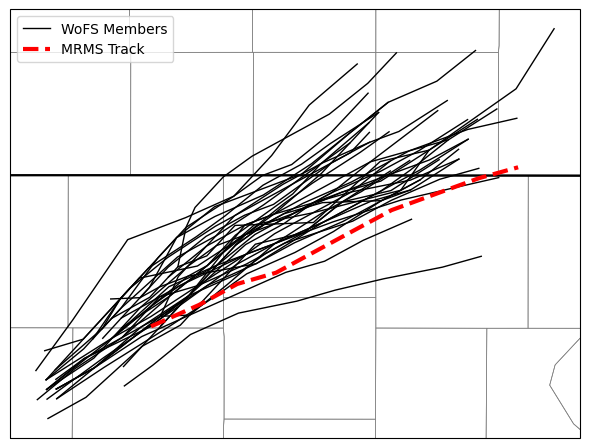

In [177]:
# Plot all member storm tracks

ds_mrms = xr.open_dataset(f'/Volumes/faletti_backup/MRMS_data/MRMS_{case[:8]}/wofs_MRMS_RAD_{case[:8]}_2235.nc')
lat = ds_mrms['lat'].values
lon = ds_mrms['lon'].values


fig = plt.figure(figsize=(6,6))

ax = plt.subplot(1,1,1,projection=ccrs.Mercator())

for i in range(36):
        # if statement to allow only one legend instance for WoFS tracks
    if i == 0:
        ax.plot(lon[df_center.iloc[i,2::2].values[:-1], df_center.iloc[i,3::2].values[:-1]], 
                lat[df_center.iloc[i,2::2].values[:-1], df_center.iloc[i,3::2].values[:-1]], 
                c='k', transform=ccrs.PlateCarree(), lw=1)
    else:
        ax.plot(lon[df_center.iloc[i,2::2].values[:-1], df_center.iloc[i,3::2].values[:-1]], 
                lat[df_center.iloc[i,2::2].values[:-1], df_center.iloc[i,3::2].values[:-1]], 
                label='_nolegend_', c='k', transform=ccrs.PlateCarree(), lw=1)
        
ax.plot(lon[df_center.iloc[:,2::2].values[-1],df_center.iloc[:,3::2].values[-1]],
        lat[df_center.iloc[:,2::2].values[-1],df_center.iloc[:,3::2].values[-1]],
        c='r', lw=3, ls='--', transform=ccrs.PlateCarree())


for j in range(len(shapefiles)):
    reader = shpreader.Reader(shapefiles[j])
    vector_data = list(reader.geometries()) 
    VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
    ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])

#ax.set_extent([-102.5, -96.5, 32.5, 37.1], crs=ccrs.PlateCarree())

#ax.pcolormesh(lon, lat, ds_mrms['aws_mid_cress'], transform=ccrs.PlateCarree())

plt.legend(['WoFS Members', 'MRMS Track'])

plt.tight_layout()

### Now crop 300x300 gridpoint domains to 250x250 centered on the MRMS observed supercell, then save to netCDF file.

This centers WoFS member mesocyclones onto the location of the observed MRMS storm. To do this, the WoFS domain is cropped (sliced) to the same dimensions about different indices depending on the MRMS-WoFS displacement vector.

NetCDF files are then written in the same format as processed WoFS files but with different (smaller) dimensions.

In [178]:
if case == '201905172200':
    files_15min = sorted(glob.glob(f'/Volumes/faletti_backup/WOFS_output/wofs_{case[:8]}_{case[8:]}/newfiles/wofs_i*'))[1:-2]
    df_displace = df_displace.iloc[:,:-2]
if case == '201905202030':
    files_15min = sorted(glob.glob(f'/Volumes/faletti_backup/WOFS_output/wofs_{case[:8]}_{case[8:]}/newfiles/wofs_i*'))[1:-4]
    df_displace = df_displace.iloc[:,:-2]
if case == '201905262000':
    files_15min = sorted(glob.glob(f'/Volumes/faletti_backup/WOFS_output/wofs_{case[:8]}_{case[8:]}/newfiles/wofs_i*'))[1:-6]
    df_displace = df_displace.iloc[:,:-8]
if case == '201905282230':
    files_15min = sorted(glob.glob(f'/Volumes/faletti_backup/WOFS_output/wofs_{case[:8]}_{case[8:]}/newfiles/wofs_i*'))[1:-2]
    df_displace = df_displace.iloc[:,:-2]

files_15min = [file for file in files_15min if any(ext in file for ext in ['00.nc','15.nc','30.nc','45.nc'])]
files_15min

['/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905282245.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905282300.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905282315.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905282330.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905282345.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905290000.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905290015.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905290030.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfiles/wofs_i201905282230_v201905290045.nc',
 '/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/newfile

In [179]:
# Use displacement coordinates and iterate through time and members, saving a file for each timestep

buffer = 30

print('Initiating file save.\n')

    # iterate through time
for i, (nxcol, nycol) in enumerate(zip(df_displace.columns[0::2], df_displace.columns[1::2])):
    
    ds_wofs = xr.open_dataset(files_15min[i])
    
    nx_displ = df_displace[nxcol].values
    ny_displ = df_displace[nycol].values

#nx_displ = df_displace['2200 UTC nx'].values
#ny_displ = df_displace['2200 UTC ny'].values

    # iterate through members
    dslist_mem = []
    for j in range(36):
        ds_iter = ds_wofs.isel(Member=j, south_north=slice(buffer+1+nx_displ[j],300-buffer+1+nx_displ[j]),
                                         west_east=slice(buffer+1+ny_displ[j],300-buffer+1+ny_displ[j]))
        
        dslist_mem.append(ds_iter)
        
    ds_concat = xr.concat(objs=dslist_mem, dim='Member')
    
    ds_concat.attrs['CENTER_NY'] = df_center.tail(1)[nxcol].values[0] - (buffer + 1)
    ds_concat.attrs['CENTER NX'] = df_center.tail(1)[nycol].values[0] - (buffer + 1)
    
    print(f'Writing file for {nxcol[:8]}.')
    
    ds_concat.to_netcdf(path=files_15min[i][:54] + '/centered/wofs_center_' + files_15min[i][69:])
    
    print(f'File for {nxcol[:8]} written.')
    
print('\nFile saving complete.')

Writing file for 2245 UTC.
File for 2245 UTC written.
Writing file for 2300 UTC.
File for 2300 UTC written.
Writing file for 2315 UTC.
File for 2315 UTC written.
Writing file for 2330 UTC.
File for 2330 UTC written.
Writing file for 2345 UTC.
File for 2345 UTC written.
Writing file for 0000 UTC.
File for 0000 UTC written.
Writing file for 0015 UTC.
File for 0015 UTC written.
Writing file for 0030 UTC.
File for 0030 UTC written.
Writing file for 0045 UTC.
File for 0045 UTC written.
Writing file for 0100 UTC.
File for 0100 UTC written.

File saving complete.


In [ ]:
# Plot to manually inspect

files_centered = sorted(glob.glob('/Volumes/faletti_backup/WOFS_output/wofs_20190528_2230/wofs_center_i*'))

for file in files_centered[2:3]:
    
    ds = xr.open_dataset(file)
    
    for i in range(36):
        fig = plt.figure(figsize=(10,10))
        ax = plt.subplot(1,1,1,projection=ccrs.Mercator())
        
        cref = np.where(ds['UP_HELI_MAX'][i,0]>10, ds['UP_HELI_MAX'][i,0], np.nan)
        
        ax.pcolormesh(ds['XLONG'][i,0].values, ds['XLAT'][i,0].values, cref, cmap='gist_ncar', transform=ccrs.PlateCarree())
        
        #ax.set_xticks(np.arange(0,250,10))
        #ax.set_yticks(np.arange(0,250,10))
        
        #plt.xlim(0,250)
        #plt.ylim(0,250)
        #plt.grid()
        
        #for j in range(len(shapefiles)):
        #    reader = shpreader.Reader(shapefiles[j])
        #    vector_data = list(reader.geometries()) 
        #    VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
        #    ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])
        
        #plt.savefig(f'{file[-7:-3]}utc_mem{i}_ref.jpg')

In [ ]:
for i in files_centered:
    ds_cent = xr.open_dataset(i)
    
    #uh = np.where(ds_cent.UP_HELI_MAX[0,0] < 10, np.nan, ds_cent.UP_HELI_MAX[0,0])
    
    plt.figure()
    plt.pcolor(ds_cent.UP_HELI_MAX[0,0], cmap='plasma')
    #plt.scatter(135,168)
    
    plt.xlim(0,240)
    plt.ylim(0,240)

In [36]:
for file in sorted(glob.glob('/Volumes/TTU_desktop_backup/WOFS_output/wofs_20190526_2230/*/*'))[1:]:

    ds=xr.open_dataset(file)
    
    lat = ds['XLAT'][0,0].values
    lon = ds['XLONG'][0,0].values
    
    for i in range(len(ds['REFD_MAX'])):
        fig = plt.figure(figsize=(10,8))
        ax = plt.axes(projection=ccrs.Mercator())
        
        cb = ax.contourf(lon, lat, ds['REFD_MAX'][i,0], levels=np.arange(10,75,5), cmap='gist_ncar', transform=ccrs.PlateCarree())
        ax.contour(lon, lat, ds['UH_30SWT25_WRF'][i,0], levels=[30,1000], colors='k', transform=ccrs.PlateCarree())
        
        for j in range(len(shapefiles)):
            reader = shpreader.Reader(shapefiles[j])
            vector_data = list(reader.geometries())
            VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
            ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])
            
        plt.savefig(f'/Users/williamfaletti/Desktop/output/mem{str(i).zfill(2)}_{file[-15:-3]}', 
                    dpi = 200, bbox_inches='tight', pad_inches=0.2, facecolor='w')

# Plotting of MRMS timeseries

import netCDF4 as nc
import os

files = sorted(glob.glob('/Users/williamfaletti/Downloads/mrms_new/wofs_MRMS_RAD_2019*'))[4:]

for idx in range(len(files)):

    fig = plt.figure(figsize=(10,10))
    
    cmap = colors.ListedColormap(['k'])
    
    
    # Azimuthal shear
    ax = plt.subplot(1,2,1,projection=ccrs.Mercator())
    
    ds_mrms = nc.Dataset(files[idx])
    
    cref = ds_mrms.variables['dz_cress'][:]#[120:235,100:200].values
    cref = np.where(cref >= 10, cref, np.nan)
    aws = ds_mrms.variables['aws_mid_cress'][:]#[120:235,100:200].values
    aws = np.where(aws > 0.0005, aws, np.nan)
    lat = ds_mrms.variables['lat'][:]#[120:235,100:200].values
    lon = ds_mrms.variables['lon'][:]#[120:235,100:200].values
    
    #poss_maxima = ds_maxima_mrms['maxima_indices'][idx].values
    
    ax.pcolormesh(lon, lat, aws, transform=ccrs.PlateCarree(), cmap='plasma')
    
    for j in range(len(shapefiles)):
        reader = shpreader.Reader(shapefiles[j])
        vector_data = list(reader.geometries()) 
        VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
        ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])
    
    plt.title(files[idx][-16:-3])
    
    
    # Reflectivity
    ax = plt.subplot(1,2,2,projection=ccrs.Mercator())
    
    cf = ax.pcolormesh(lon, lat, cref, cmap='gist_ncar',
                     alpha=0.7, transform=ccrs.PlateCarree())
    
    for j in range(len(shapefiles)):
        reader = shpreader.Reader(shapefiles[j])
        vector_data = list(reader.geometries()) 
        VECTOR_DATA = cfeature.ShapelyFeature(vector_data, ccrs.PlateCarree())
        ax.add_feature(VECTOR_DATA, facecolor='none', edgecolor = edgecolor[j], lw = lw[j])
    
    #ax.scatter(lon[poss_maxima[:,0], poss_maxima[:,1]], lat[poss_maxima[:,0], poss_maxima[:,1]], 
    #           transform=ccrs.PlateCarree(), marker='x', c='k')
    
    #plt.scatter(lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]], 
    #           transform=ccrs.PlateCarree(), marker='x', s=180, linewidth=4, c='r')
    
    #ax.annotate((poss_maxima[test_idx,0], poss_maxima[test_idx,1]), 
    #            (lon[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05, lat[poss_maxima[test_idx,0], poss_maxima[test_idx,1]]+0.05), 
    #           transform=ccrs.PlateCarree(), size=16, c='r')
    
    plt.title(files[idx][-16:-3])
    
    plt.tight_layout()
    
    outsubdir = f'new_mrmsplot_{files[0][-16:-8]}'
    isExist = os.path.exists(outsubdir)
    if not isExist:
        os.mkdir(outsubdir)
    
    plt.savefig(f'{outsubdir}/{files[idx][-16:-3]}.jpg', dpi = 200, facecolor='w', bbox_inches='tight', pad_inches=0.25)